In [2]:
import pandas as pd
#data
i44v17=pd.read_csv("i44-all.csv")
i44v17['rd'] = 'i44'

i44v18=pd.read_csv("i44v18.csv")
i44v18['rd'] = 'i44'

i44v19=pd.read_csv("i44v19.csv")
i44v19['rd'] = 'i44'

#append the DFs
i44 = pd.concat([i44v17,i44v18,i44v19], ignore_index=True, sort=False)

#select weekdays
i44['measurement_tstamp'] = pd.to_datetime(i44['measurement_tstamp'])

i44['dayofweek'] = i44['measurement_tstamp'].dt.dayofweek
i44['weekday']= i44['dayofweek'].apply(lambda x: 1 if (x<5)  else 0)
i44=i44.loc[i44['weekday'] == 1]

#aggregate 
i44 = (i44.groupby([pd.Grouper(key='measurement_tstamp', freq='d')])
          .agg({'speed':'mean', 'reference_speed':'mean'}))
i44=i44.reset_index()

#create speed index
i44['speed_index'] = i44['speed']/i44['reference_speed']
#i44 = i44.dropna()
# i44v1=i44['speed'].fillna((i44['speed'].mean()), inplace=True)
# i44v1=i44['reference_speed'].fillna((i44['reference_speed'].mean()), inplace=True)
# i44v1=i44['speed_index'].fillna((i44['speed_index'].mean()), inplace=True)
i44['speed'] = i44['speed'].fillna((i44['speed'].mean()))
i44['reference_speed'] = i44['reference_speed'].fillna((i44['reference_speed'].mean()))
i44['speed_index'] = i44['speed_index'].fillna((i44['speed_index'].mean()))

#examine pre and post intervention periods
t1= i44.loc[(i44['measurement_tstamp'] == '2018-03-01')]
t2= i44.loc[(i44['measurement_tstamp'] == '2018-12-31')]
t1,t2
#2341,2646

i44 = i44[['speed_index','speed']]
i44 = i44.rename(columns = {'speed_index': 'y','speed':'x'})

pre_period = [0, 2341]
post_period = [2342, 2646]

i44.iloc[2342:, 0] += 5

from causalimpact import CausalImpact
ci = CausalImpact(i44, pre_period, post_period)

Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
Do not call `graph_parents`.
Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.
Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.


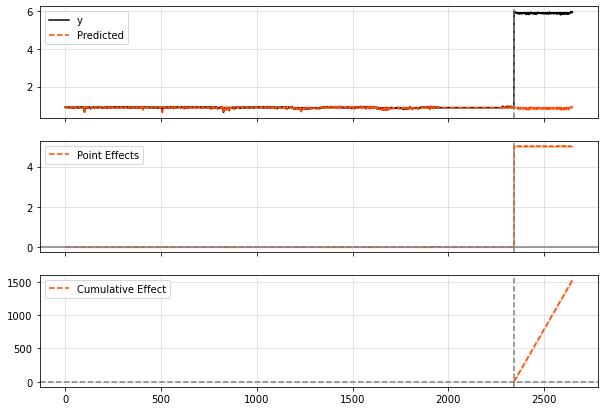

In [3]:
ci.plot()

In [4]:
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    5.87               1789.11
Prediction (s.d.)         0.86 (0.0)         262.56 (1.14)
95% CI                    [0.85, 0.87]       [260.14, 264.61]

Absolute effect (s.d.)    5.01 (0.0)         1526.55 (1.14)
95% CI                    [5.0, 5.01]        [1524.49, 1528.96]

Relative effect (s.d.)    581.41% (0.43%)    581.41% (0.43%)
95% CI                    [580.62%, 582.33%] [580.62%, 582.33%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [5]:
print(ci.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 5.87. By contrast, in the absence of an
intervention, we would have expected an average response of 0.86.
The 95% interval of this counterfactual prediction is [0.85, 0.87].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 5.01 with a 95% interval of
[5.0, 5.01]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 1789.11.
By contrast, had the intervention not taken place, we would have expected
a sum of 262.56. The 95% interval of this prediction is [260.14, 264.61].


The above results are given in terms of absolute numbers. In relative
terms, the response variable show